# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [7]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [8]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [9]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [13]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7,1e-6,1e-5,1e-4]
regularization_strengths = [5e4, 5e5, 5e6,1e3,5e2,1]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for lr in learning_rates:
    for reg in regularization_strengths:
        print("lr and reg is ", lr, reg)
        svm = LinearSVM()
        svm.train(X_train_feats, y_train, learning_rate=lr, reg=reg,
                          num_iters=800, verbose=True)
        y_train_pred = svm.predict(X_train_feats)
        train_acc = np.mean(y_train == y_train_pred)
        y_val_pred = svm.predict(X_val_feats)
        valid_acc = np.mean(y_val == y_val_pred)
        if valid_acc > best_val:
            best_val = valid_acc
            best_svm = svm
        results[(lr,reg)] = (train_acc,valid_acc)
# pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr and reg is  1e-09 50000.0
iteration 0 / 800: loss 83.177312
iteration 100 / 800: loss 81.692045
iteration 200 / 800: loss 80.265523
iteration 300 / 800: loss 78.848802
iteration 400 / 800: loss 77.463758
iteration 500 / 800: loss 76.122532
iteration 600 / 800: loss 74.782424
iteration 700 / 800: loss 73.486509
lr and reg is  1e-09 500000.0
iteration 0 / 800: loss 770.771632
iteration 100 / 800: loss 632.633708
iteration 200 / 800: loss 519.528486
iteration 300 / 800: loss 426.949022
iteration 400 / 800: loss 351.160629
iteration 500 / 800: loss 289.099814
iteration 600 / 800: loss 238.312802
iteration 700 / 800: loss 196.715975
lr and reg is  1e-09 5000000.0
iteration 0 / 800: loss 7993.518862
iteration 100 / 800: loss 1078.760341
iteration 200 / 800: loss 152.324833
iteration 300 / 800: loss 28.202563
iteration 400 / 800: loss 11.572967
iteration 500 / 800: loss 9.344642
iteration 600 / 800: loss 9.046182
iteration 700 / 800: loss 9.006174
lr and reg is  1e-09 1000.0
iteration 0 / 

cs231n/classifiers/linear_svm.py:87: RuntimeWarning: overflow encountered in double_scalars
  loss += reg * np.sum(W * W)
cs231n/classifiers/linear_svm.py:87: RuntimeWarning: overflow encountered in multiply
  loss += reg * np.sum(W * W)


iteration 200 / 800: loss inf
iteration 300 / 800: loss inf


cs231n/classifiers/linear_svm.py:108: RuntimeWarning: overflow encountered in multiply
  dW = dW/num_train + 2*reg*W
cs231n/classifiers/linear_svm.py:85: RuntimeWarning: invalid value encountered in greater
  loss = np.sum(margin[margin > 0])
cs231n/classifiers/linear_svm.py:103: RuntimeWarning: invalid value encountered in greater
  aux[margin>0] = 1
cs231n/classifiers/linear_classifier.py:73: RuntimeWarning: invalid value encountered in add
  self.W += -learning_rate * grad


iteration 400 / 800: loss nan
iteration 500 / 800: loss nan
iteration 600 / 800: loss nan
iteration 700 / 800: loss nan
lr and reg is  1e-06 1000.0
iteration 0 / 800: loss 10.593515
iteration 100 / 800: loss 10.067313
iteration 200 / 800: loss 9.721742
iteration 300 / 800: loss 9.475408
iteration 400 / 800: loss 9.307864
iteration 500 / 800: loss 9.201797
iteration 600 / 800: loss 9.127360
iteration 700 / 800: loss 9.082145
lr and reg is  1e-06 500.0
iteration 0 / 800: loss 9.763675
iteration 100 / 800: loss 9.627399
iteration 200 / 800: loss 9.508714
iteration 300 / 800: loss 9.406003
iteration 400 / 800: loss 9.320077
iteration 500 / 800: loss 9.253538
iteration 600 / 800: loss 9.200544
iteration 700 / 800: loss 9.164892
lr and reg is  1e-06 1
iteration 0 / 800: loss 8.997916
iteration 100 / 800: loss 8.998999
iteration 200 / 800: loss 8.994738
iteration 300 / 800: loss 8.992161
iteration 400 / 800: loss 8.969107
iteration 500 / 800: loss 8.959772
iteration 600 / 800: loss 8.958581
i

In [14]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.446


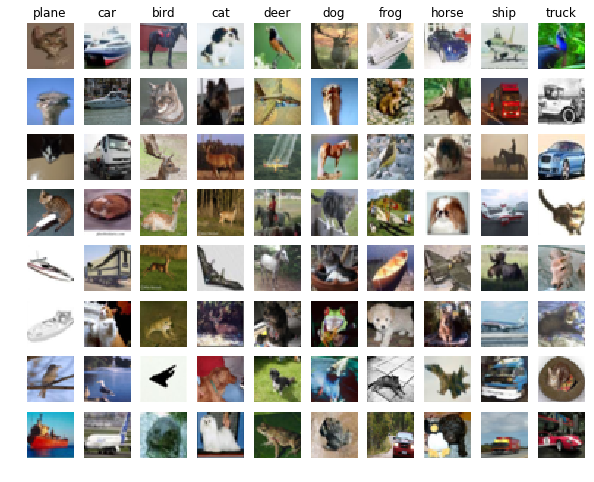

In [15]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?  
For example, we can see that like plane. The blue background are tend to be plane in the sky. Mechanics could be in this,too.

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [16]:
print(X_train_feats.shape)

(49000, 155)


In [34]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = [100,200,300]
batch_size = [128,256,512]
learning_rate = [1e-6,1e-5,1e-4,1e-3,1e-2]
reg = [1e-4,1e-3,1e-2,1e-1,1]

num_classes = 10
best_val = -1
# net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
for h in hidden_dim:
    net = TwoLayerNet(input_dim, h, num_classes)
    for bs in batch_size:
        for r in reg:
            for lr in learning_rate:
                print("hidden_dim:",h,"  batch_size:",bs,"  reg:  ",r,"  learning_rate:",lr)
                stats = net.train(X_train_feats, y_train,X_val_feats, y_val,\
                                 learning_rate=lr, reg=r,num_iters=2000,batch_size=bs, \
                                 verbose=True)
                valid_acc = stats["train_acc_history"][-1]
                train_acc = stats["val_acc_history"][-1]
                if valid_acc > best_val:
                    best_val = valid_acc
                    best_net = net
                results[(h,bs,r,lr)] = (train_acc,valid_acc)
                print("train_acc:",train_acc,"  valid_acc:",valid_acc,"\n","\n")
# pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

hidden_dim: 100   batch_size: 128   reg:   0.0001   learning_rate: 1e-06
iteration 0 / 2000: loss 2.302585
iteration 100 / 2000: loss 2.302585
iteration 200 / 2000: loss 2.302585
iteration 300 / 2000: loss 2.302585
iteration 400 / 2000: loss 2.302585
iteration 500 / 2000: loss 2.302585
iteration 600 / 2000: loss 2.302585
iteration 700 / 2000: loss 2.302585
iteration 800 / 2000: loss 2.302585
iteration 900 / 2000: loss 2.302585
iteration 1000 / 2000: loss 2.302585
iteration 1100 / 2000: loss 2.302585
iteration 1200 / 2000: loss 2.302585
iteration 1300 / 2000: loss 2.302585
iteration 1400 / 2000: loss 2.302585
iteration 1500 / 2000: loss 2.302586
iteration 1600 / 2000: loss 2.302585
iteration 1700 / 2000: loss 2.302585
iteration 1800 / 2000: loss 2.302585
iteration 1900 / 2000: loss 2.302585
train_acc: 0.071   valid_acc: 0.1015625 
 

hidden_dim: 100   batch_size: 128   reg:   0.0001   learning_rate: 1e-05
iteration 0 / 2000: loss 2.302585
iteration 100 / 2000: loss 2.302585
iteration 20

In [56]:
input_dim = X_train_feats.shape[1]
hidden_dim = 200
batch_size = 128
learning_rate = 1e-4
reg = 0.1

num_classes = 10
net = TwoLayerNet(input_dim, hidden_dim, num_classes)
stat = net.train(X_train_feats, y_train,X_val_feats, y_val,\
                 learning_rate=1e-4, reg=0.1,num_iters=2000,batch_size=128, \
                 verbose=True)


iteration 0 / 2000: loss 2.302618
iteration 100 / 2000: loss 2.302616
iteration 200 / 2000: loss 2.302615
iteration 300 / 2000: loss 2.302616
iteration 400 / 2000: loss 2.302622
iteration 500 / 2000: loss 2.302617
iteration 600 / 2000: loss 2.302624
iteration 700 / 2000: loss 2.302608
iteration 800 / 2000: loss 2.302617
iteration 900 / 2000: loss 2.302620


KeyboardInterrupt: 

In [54]:
(net.predict(X_val_feats) == y_val).mean()

0.091999999999999998

In [49]:
results

{(1e-09, 1): (0.097489795918367345, 0.090999999999999998),
 (1e-09, 500.0): (0.08938775510204082, 0.094),
 (1e-09, 1000.0): (0.089102040816326528, 0.085000000000000006),
 (1e-09, 50000.0): (0.11261224489795918, 0.105),
 (1e-09, 500000.0): (0.087836734693877552, 0.081000000000000003),
 (1e-09, 5000000.0): (0.1426734693877551, 0.16300000000000001),
 (1e-08, 1): (0.10412244897959183, 0.10000000000000001),
 (1e-08, 500.0): (0.10163265306122449, 0.105),
 (1e-08, 1000.0): (0.076816326530612239, 0.074999999999999997),
 (1e-08, 50000.0): (0.099020408163265308, 0.11),
 (1e-08, 500000.0): (0.32581632653061227, 0.30599999999999999),
 (1e-08, 5000000.0): (0.40381632653061222, 0.40400000000000003),
 (1e-07, 1): (0.12702040816326532, 0.11),
 (1e-07, 500.0): (0.085551020408163259, 0.085000000000000006),
 (1e-07, 1000.0): (0.11459183673469388, 0.122),
 (1e-07, 50000.0): (0.41289795918367345, 0.41199999999999998),
 (1e-07, 500000.0): (0.4036530612244898, 0.40300000000000002),
 (1e-07, 5000000.0): (0.32

In [37]:
best_val

0.5546875

In [36]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.086


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!